## Gerekli kütüphaneleri yükleyin

*MERT TOSUN 210601027 BİLGİSAYAR MÜHENDİSLİĞİ BYM446 VERİ MADENCİLİĞİNE GİRİŞ*

In [ ]:
# ===============================================================

import pandas as pd #veri yükleme ve işleme
import numpy as np  #sayısal işlemler
import matplotlib.pyplot as plt #görselleştirme
import seaborn as sns #görselleştirme

from sklearn.preprocessing import MinMaxScaler #normalizasyon için
from sklearn.decomposition import PCA  # boyut indirgeme
from scipy.spatial import distance     #Öklidyen ve Manhattan mesafesi hesaplamak için


In [ ]:
# ===============================================================

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"

df = pd.read_csv(
    url,
    header=None,
    names=[
        'age', 'workclass', 'fnlwgt', 'education', 'education-num',
        'marital-status', 'occupation', 'relationship', 'race', 'sex',
        'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'
    ],
    na_values=" ?",
    skipinitialspace=True
)
df.head()


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Bu kod, "Adult Income Dataset" veri setini internetten indirerek bir Pandas DataFrame'ine yükler. Ayrıca veri setinde olmayan sütun adları tanımlanır, " ?" ile gösterilen eksik veriler NaN olarak işaretlenir ve boşluklar temizlenir.
Son olarak, ilk 5 satır görüntülenerek veri yapısı incelenir.

names=[...] şunu sağlar:
Sütunlara anlamlı isimler veririz. Böylece ileride şu işlemleri kolayca yaparız:

* df['age'].mean() gibi istatistik hesaplama,
* df['education'].value_counts() gibi analizler,
* Grafik çizerken sütun isimleriyle referans verme.



In [ ]:
# ===============================================================

df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

###  İstatistiksel Veri Türleri Açıklaması
- **Nominal:** Sadece etiket – sıralama yok (örnek: cinsiyet, meslek)
- **Ordinal:** Sıralama var ama aralık bilinmez (örnek: eğitim seviyesi)
- **Interval:** Aralık anlamlı ama 0 noktası keyfi (örnek: sıcaklık °C)
- **Ratio:** Gerçek sıfır ve oran alınabilir (örnek: yaş, gelir)

  Öznitelik Türleri Tablosu

| Öznitelik         | Veri Türü (Tip) | Gerekçe |
|-------------------|-----------------|---------|
| age               | Ratio           | Yaş sayısal bir veridir, sıfır noktası anlamlıdır, oran alınabilir (örneğin 40 yaş, 20 yaşın 2 katıdır). |
| workclass         | Nominal         | İş sınıfı sadece kategorik etiketlerden oluşur; sıralama veya hesaplama yapılamaz. |
| fnlwgt            | Ratio           | Örnekleme ağırlığıdır, sayısaldır ve sıfır noktası anlamlıdır; oran alınabilir. |
| education         | Ordinal         | Eğitim seviyeleri belli bir sıralamaya sahiptir (örneğin HS < Bachelor < Masters). |
| education-num     | Ordinal         | Eğitim seviyesinin sayısal karşılığıdır; sıralama vardır ama değerler arası fark sabit değildir. |
| marital-status    | Nominal         | Kategorik veridir (evli, bekar, boşanmış vb.), sıralama içermez. |
| occupation        | Nominal         | Meslek türleri etiket olarak yazılır, sıralama veya hesaplama yapılamaz. |
| relationship      | Nominal         | Aile içindeki konum bilgisidir, sıralama içermez. |
| race              | Nominal         | Irk bilgisi sadece etiketlerden oluşur (White, Black, Asian-Pac-Islander vb.). |
| sex               | Nominal         | Cinsiyet bilgisi (Male, Female), sıralama içermez. |
| capital-gain      | Ratio           | Sayısal verilerdir; 0 anlamlıdır ve oran alınabilir (örneğin 10000 kazanç, 5000’in 2 katı). |
| capital-loss      | Ratio           | Sayısal verilerdir, kazançtaki gibi oranlı ve sıfır anlamlıdır. |
| hours-per-week    | Ratio           | Çalışılan saatler sayısaldır, sıfır noktası anlamlıdır ve oran alınabilir. |
| native-country    | Nominal         | Ülke isimleri yalnızca kategorik tanımlardır, sıralanamaz. |
| income            | Ordinal         | İkili sınıf olmasına rağmen sıralama anlamı vardır (<=50K < >50K). |


In [ ]:
# ===============================================================

numerical_columns = [
    'age',              # Yaş
    'fnlwgt',           # Örnekleme ağırlığı
    'education-num',    # Eğitim seviyesi (sayısal)
    'capital-gain',     # Sermaye kazancı
    'capital-loss',     # Sermaye kaybı
    'hours-per-week'    # Haftalık çalışma saati
]
for col in numerical_columns:
    print(f"--- {col} ---")
    print(f"Ortalama (Mean): {df[col].mean():.2f}")
    print(f"Medyan (Median): {df[col].median():.2f}")
    print(f"Mod (Mode): {df[col].mode()[0]}")
    print(f"Minimum: {df[col].min()}")
    print(f"Maksimum: {df[col].max()}")
    print(f"Standart Sapma: {df[col].std():.2f}")
    print()


--- age ---
Ortalama (Mean): 38.58
Medyan (Median): 37.00
Mod (Mode): 36
Minimum: 17
Maksimum: 90
Standart Sapma: 13.64

--- fnlwgt ---
Ortalama (Mean): 189778.37
Medyan (Median): 178356.00
Mod (Mode): 123011
Minimum: 12285
Maksimum: 1484705
Standart Sapma: 105549.98

--- education-num ---
Ortalama (Mean): 10.08
Medyan (Median): 10.00
Mod (Mode): 9
Minimum: 1
Maksimum: 16
Standart Sapma: 2.57

--- capital-gain ---
Ortalama (Mean): 1077.65
Medyan (Median): 0.00
Mod (Mode): 0
Minimum: 0
Maksimum: 99999
Standart Sapma: 7385.29

--- capital-loss ---
Ortalama (Mean): 87.30
Medyan (Median): 0.00
Mod (Mode): 0
Minimum: 0
Maksimum: 4356
Standart Sapma: 402.96

--- hours-per-week ---
Ortalama (Mean): 40.44
Medyan (Median): 40.00
Mod (Mode): 40
Minimum: 1
Maksimum: 99
Standart Sapma: 12.35



- **age (yaş)**: Ortalama yaş yaklaşık 38 civarındadır. Yaşlar 17 ile 90 arasında değişmektedir. Bu da veri setinin çoğunlukla 30-40 yaş aralığındaki bireyleri içerdiğini göstermektedir.

- **fnlwgt (örnekleme ağırlığı)**: Ortalama yaklaşık 190.000 civarındadır. Bu değer, bireyin temsil ettiği kişi sayısını ifade eder. Büyük farklılıklar olduğu için aykırı değerler içerebilir.

- **education-num (eğitim seviyesi sayısal)**: Ortalama eğitim seviyesi yaklaşık 10’dur. Bu, bireylerin çoğunun lise sonrası kısa süreli eğitim aldığını göstermektedir.

- **capital-gain (sermaye kazancı)**: Ortalaması yüksek olsa da medyanı 0’dır. Çoğu kişi sermaye kazancı elde etmemiştir.

- **capital-loss (sermaye kaybı)**: Tıpkı capital-gain gibi, medyanı 0’dır. Az sayıda kişi bu tür bir kayıp yaşamıştır.

- **hours-per-week (haftalık çalışma saati)**: Ortalama 40 saattir. Bu da çoğu kişinin tam zamanlı çalıştığını gösterir. Ancak 1 saat ve 99 saat gibi uç değerler vardır.


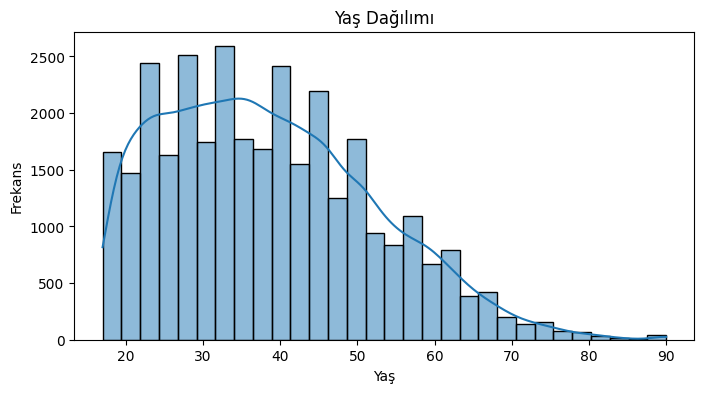

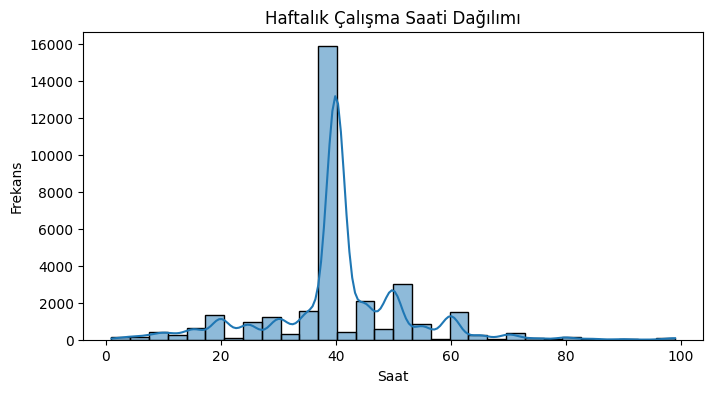

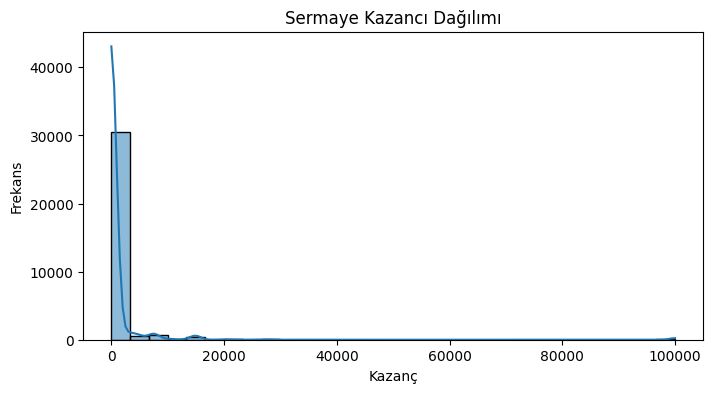

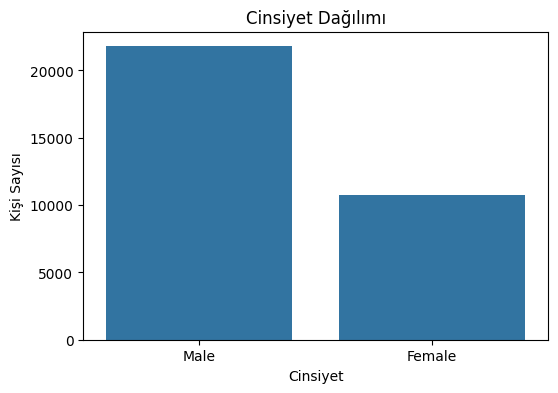

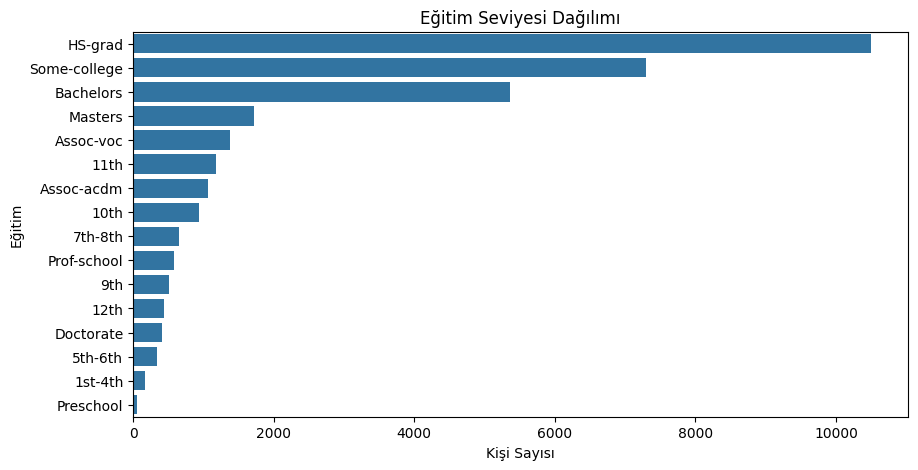

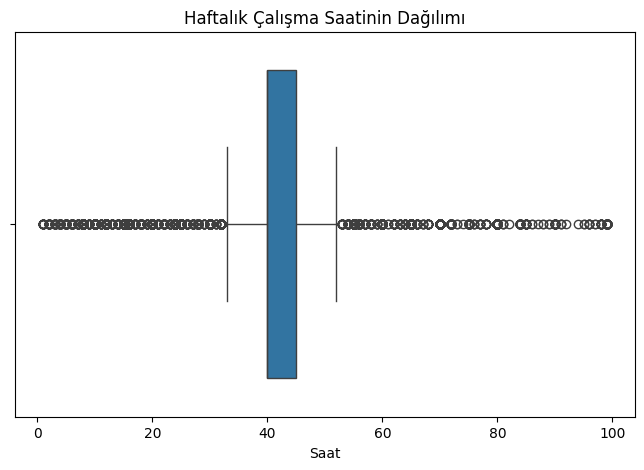

In [ ]:
# ===============================================================
# Histogram: Yaş
plt.figure(figsize=(8, 4))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Yaş Dağılımı')
plt.xlabel('Yaş')
plt.ylabel('Frekans')
plt.show()

# Histogram: Haftalık Çalışma Saati
plt.figure(figsize=(8, 4))
sns.histplot(df['hours-per-week'], bins=30, kde=True)
plt.title('Haftalık Çalışma Saati Dağılımı')
plt.xlabel('Saat')
plt.ylabel('Frekans')
plt.show()

# Histogram: Sermaye Kazancı
plt.figure(figsize=(8, 4))
sns.histplot(df['capital-gain'], bins=30, kde=True)
plt.title('Sermaye Kazancı Dağılımı')
plt.xlabel('Kazanç')
plt.ylabel('Frekans')
plt.show()

# Cinsiyet
plt.figure(figsize=(6, 4))
sns.countplot(x='sex', data=df)
plt.title('Cinsiyet Dağılımı')
plt.xlabel('Cinsiyet')
plt.ylabel('Kişi Sayısı')
plt.show()

# Eğitim
plt.figure(figsize=(10, 5))
sns.countplot(y='education', data=df, order=df['education'].value_counts().index)
plt.title('Eğitim Seviyesi Dağılımı')
plt.xlabel('Kişi Sayısı')
plt.ylabel('Eğitim')
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(x='hours-per-week', data=df)
plt.title('Haftalık Çalışma Saatinin Dağılımı')
plt.xlabel('Saat')
plt.show()


### 📊 TABLOLAR ve DEĞERLENDİRME
---

#### 1. Yaş Dağılımı (Histogram)

- Yaşlar yaklaşık **17 ila 90** arasında dağılmış.
- En yoğun yaş aralığı **20–40 yaş**.
- Grafik sağa çarpık değildir, oldukça **dengeli bir dağılım** gösterir.
- Çalışan bireylerin büyük çoğunluğu genç ve orta yaşlı bireylerdir.

---

#### 2. Haftalık Çalışma Saati Dağılımı (Histogram)

- En çok çalışan saat: **40 saat** (tam zamanlı).
- 40 saat dışında da çalışanlar var, ama çok sayıda kişi 40 saat çalışıyor.
- Grafik oldukça **dar ve sivri**; bu da çalışma saatinin genellikle sabit olduğunu gösteriyor.
- Uç değerler 1–99 saat arası dağılıyor ama çok seyrek.

---

#### 3. Sermaye Kazancı Dağılımı (Histogram)

- Grafikte **çok fazla kişi 0 kazanç** elde etmiş.
- Yalnızca az sayıda kişi yüksek kazanç almış.
- Bu nedenle grafik **sağa çarpık**; çoğunluk grafiğin sol tarafına yığılmış.
- Kazançların eşit dağılmadığı ve çoğu bireyin bu tür gelir elde etmediği görülüyor.

---

#### 4. Cinsiyet Dağılımı (Barplot)

- Veri setindeki bireylerin çoğunluğu **erkek (male)**.
- Kadın bireyler, erkeklerin yaklaşık yarısı kadar temsil edilmiş.
- Bu dağılım, işgücü verilerinde erkeklerin daha baskın olduğunu gösterebilir.

---

#### 5. Eğitim Seviyesi Dağılımı (Barplot)

- En sık görülen eğitim seviyesi: **HS-grad (lise mezunu)**.
- Onu sırasıyla **Some-college** ve **Bachelors** (lisans mezunu) izliyor.
- Düşük eğitim düzeyleri (1st–4th gibi) ve çok yüksek düzeyler (Doctorate) daha az temsil edilmiş.
- Veri setindeki bireylerin çoğu **orta seviye eğitim düzeyine** sahip.

---

#### 6. Haftalık Çalışma Saati Dağılımı (Boxplot)

- Medyan: **40 saat**, yani çoğu kişi tam zamanlı çalışıyor.
- 1–10 saat çalışan bireyler (yarı zamanlı), 60+ saat çalışanlar ise **aykırı (uç) değer** olarak görülmekte.
- Boxplot sağa uzayan bir yapı gösteriyor, bu da **bazı kişilerin aşırı uzun saatler çalıştığını** ortaya koyuyor.

---

### 📌 Genel Gözlem:
Grafiklerdeki dağılımlar, veri setinde demografik çeşitliliği, eğitim düzeylerini ve iş yaşamı yoğunluğunu göstermektedir. Çoğu değişken için merkezde yoğunlaşma varken, kazanç gibi bazı değişkenlerde uç değerler baskın görünüyor.


In [ ]:
# ===============================================================

# Sayısal kolonları belirle
numerical_columns = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

# İki satır seç (örnek olarak 0. ve 1. satır)
sample1 = df.loc[0, numerical_columns]
sample2 = df.loc[1, numerical_columns]

print("Sample 1:\n", sample1)
print("---------------------")
print("Sample 2:\n", sample2)

euclidean_dist = distance.euclidean(sample1, sample2)
manhattan_dist = distance.cityblock(sample1, sample2)

print("---------------------------------------")
print(f"Öklidyen Mesafe: {euclidean_dist:.2f}")
print("---------------------------------------")
print(f"Manhattan Mesafe: {manhattan_dist:.2f}")
print("---------------------------------------")
# Cinsiyet kolonuna bakalım (örnek: 0. ve 1. satır)
cat_col = 'sex'
cat_val1 = df.loc[0, cat_col]
cat_val2 = df.loc[1, cat_col]

print(f"{cat_col} - Sample 1: {cat_val1}, Sample 2: {cat_val2}")

# Basit eşleşme katsayısı
smc = int(cat_val1 == cat_val2)
print(f"Basit Eşleşme Katsayısı: {smc}")# Cinsiyet kolonuna bakalım (örnek: 0. ve 1. satır)
cat_col = 'sex'
cat_val1 = df.loc[0, cat_col]
cat_val2 = df.loc[1, cat_col]

print("----------------------------")
print(f"{cat_col} - Sample 1: {cat_val1}, Sample 2: {cat_val2}")

# Basit eşleşme katsayısı
smc = int(cat_val1 == cat_val2)
print(f"Basit Eşleşme Katsayısı: {smc}")

Sample 1:
 age                  39
fnlwgt            77516
education-num        13
capital-gain       2174
capital-loss          0
hours-per-week       40
Name: 0, dtype: object
---------------------
Sample 2:
 age                  50
fnlwgt            83311
education-num        13
capital-gain          0
capital-loss          0
hours-per-week       13
Name: 1, dtype: object
---------------------------------------
Öklidyen Mesafe: 6189.44
---------------------------------------
Manhattan Mesafe: 8007.00
---------------------------------------
sex - Sample 1: Male, Sample 2: Male
Basit Eşleşme Katsayısı: 1
----------------------------
sex - Sample 1: Male, Sample 2: Male
Basit Eşleşme Katsayısı: 1


Öklidyen Mesafe (Euclidean Distance)
🔹 Tanım:
İki nokta arasındaki düz çizgi (doğrusal) uzaklıktır.
Lisede gördüğümüz klasik mesafe formülüdür

Ne zaman kullanılır?
Özellikler sürekli (sayısal) olduğunda
Gerçek fiziksel uzaklık gibi yorumlandığında
Uzaklık artırımı kareli fark olduğu için büyük farklar daha fazla etkiler (özellikle outlier'larda)

Manhattan Mesafesi (Cityblock / L1 Distance)
🔹 Tanım:
İki nokta arasındaki farkların mutlak değerlerinin toplamıdır.
Yani: "kaç birim adımla yan yana ve yukarı aşağı giderek ulaşırım" mantığı.

Ne zaman kullanılır?
Özellikler yine sayısal olabilir ama:
Daha basit ve daha dayanıklı hesap yapılır
Aykırı değerlerin etkisi daha az olur
Kentsel mesafe modellerinde çok tercih edilir (şehir blokları mantığı)

### 🔢 Benzerlik ve Farklılık Ölçümleri – Değerlendirme

İki rastgele seçilen birey üzerinden yapılan karşılaştırma şu sonuçları vermiştir:

- **Öklidyen Mesafe**: 6189.44  
İki birey arasındaki sayısal özelliklerde düz çizgi uzaklığı oldukça yüksektir. Bu fark özellikle `fnlwgt`, `capital-gain` ve `hours-per-week` değişkenlerinden kaynaklanmaktadır.

- **Manhattan Mesafe**: 8007.00  
Toplam fark daha da büyüktür. Bu metrik, bireylerin iş gücündeki davranışları açısından oldukça farklılık taşıdığını gösterir.

- **Cinsiyet için Basit Eşleşme Katsayısı**: 1  
İki bireyin cinsiyeti aynıdır (ikisi de erkek), bu nedenle bu özellikte tam benzerlik vardır.

Bu analiz, sayısal özelliklerde yüksek farklılık olmasına rağmen bazı kategorik özelliklerde benzerliğin mümkün olduğunu göstermektedir.

Veri madenciliğinde (ve makine öğrenmesinde), çok sık şu durumlar olur:

* İki müşteri birbirine benziyor mu?
* İki hastanın semptomları ne kadar yakın?
* Bu kişi daha önceki örneklerden hangisine daha yakın?

İşte burada devreye mesafe ölçüleri girer:
Öklidyen ve Manhattan, bu “benzerlik” ölçümünün sayısal yöntemleridir.


Her sütundaki eksik değer sayısı:
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

Temizlenmiş veri seti boyutu: (32561, 15)


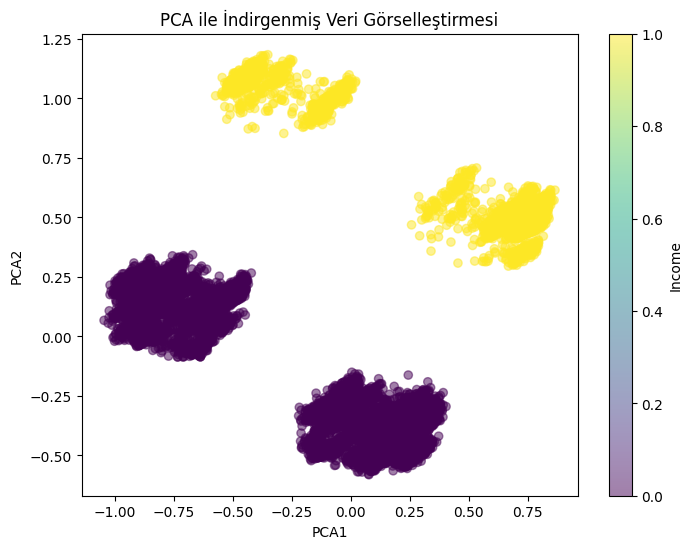

In [ ]:
# ===============================================================

# Eksik verileri kontrol et
print("Her sütundaki eksik değer sayısı:")
print(df.isnull().sum())

# Eksik verileri içeren satırları sil
df_cleaned = df.dropna()

print(f"\nTemizlenmiş veri seti boyutu: {df_cleaned.shape}")

# Kategorik sütunları seç
categorical_cols = df_cleaned.select_dtypes(include='object').columns

# Label encoding ile her kategoriyi sayıya dönüştür
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_cleaned[col] = le.fit_transform(df_cleaned[col])
    label_encoders[col] = le

scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df_cleaned), columns=df_cleaned.columns)

# PCA uygulayalım
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_normalized)

# PCA sonuçlarını dataframe'e çevir
df_pca = pd.DataFrame(data=pca_result, columns=['PCA1', 'PCA2'])

# Gelir (income) bilgisine göre renklendirme için orijinal (etiketli) değerleri al
df_pca['income'] = df_cleaned['income'].values

# Görselleştirme
plt.figure(figsize=(8, 6))
plt.scatter(df_pca['PCA1'], df_pca['PCA2'], c=df_pca['income'], cmap='viridis', alpha=0.5)
plt.title('PCA ile İndirgenmiş Veri Görselleştirmesi')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.colorbar(label='Income')
plt.show()



###  Eksik Veri Analizi

Veri setinde hiçbir sütunda eksik veri bulunmamaktadır. Bu nedenle `dropna()` sonrası veri boyutunda herhangi bir azalma olmamıştır.  
Bu, veri setinin kaliteli ve temiz olduğunu gösterir. Çalışmalar için doğrudan kullanılabilir.

- Toplam kayıt sayısı: **32.561**
- Toplam sütun sayısı: **15**

---

### 🔻 PCA ile Boyut İndirgeme ve Görselleştirme

Tüm veriler 0–1 aralığına normalleştirildikten sonra, PCA algoritması ile 2 boyuta indirgenmiştir.  
Veriler renkli olarak **income (gelir düzeyi)** sütununa göre görselleştirilmiştir.

- **Sarı noktalar**: Yüksek gelirli bireyler (>50K)
- **Mor noktalar**: Düşük gelirli bireyler (<=50K)

Gözlemler:
- Aynı sınıfa ait bireyler genellikle **birbirine yakın konumlanmış**, yani **benzer özelliklere sahip**.
- Bu durum, gelir düzeyinin veri içinde **ayrıştırılabilir olduğunu**, dolayısıyla sınıflandırma için uygun olduğunu gösterir.
